In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [11]:
df=pd.read_excel('/Users/akhilmaddu/Desktop/datasets/Default.xlsx')

In [12]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [32]:
cleanup_nums = {"default":{"yes": 1,"no": 0}}

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb



In [36]:
print(df.replace(cleanup_nums))

      default student      balance        income
1          No      No   729.526495  44361.625074
2          No     Yes   817.180407  12106.134700
3          No      No  1073.549164  31767.138947
4          No      No   529.250605  35704.493935
5          No      No   785.655883  38463.495879
6          No     Yes   919.588530   7491.558572
7          No      No   825.513331  24905.226578
8          No     Yes   808.667504  17600.451344
9          No      No  1161.057854  37468.529288
10         No      No     0.000000  29275.268293
11         No     Yes     0.000000  21871.073089
12         No     Yes  1220.583753  13268.562221
13         No      No   237.045114  28251.695345
14         No      No   606.742343  44994.555849
15         No      No  1112.968401  23810.174050
16         No      No   286.232560  45042.413036
17         No      No     0.000000  50265.312354
18         No     Yes   527.540184  17636.539617
19         No      No   485.936864  61566.106118
20         No      N

In [118]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


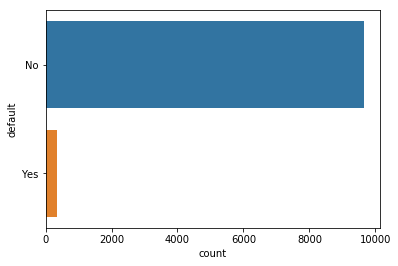

In [114]:
sb.countplot(y="default",data = df)
plt.show()

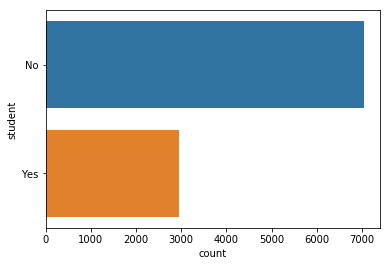

In [115]:
sb.countplot(y="student",data = df)
plt.show()

In [117]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [34]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [30]:
df[df.isnull().any(axis=1)]

,default,student,balance,income


In [31]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [38]:
df_new=pd.get_dummies(df)

In [39]:
df_new.head()

,balance,income,default_No,default_Yes,student_No,student_Yes
1,729.526495,44361.625074,1,0,1,0
2,817.180407,12106.134700,1,0,0,1
3,1073.549164,31767.138947,1,0,1,0
4,529.250605,35704.493935,1,0,1,0
5,785.655883,38463.495879,1,0,1,0


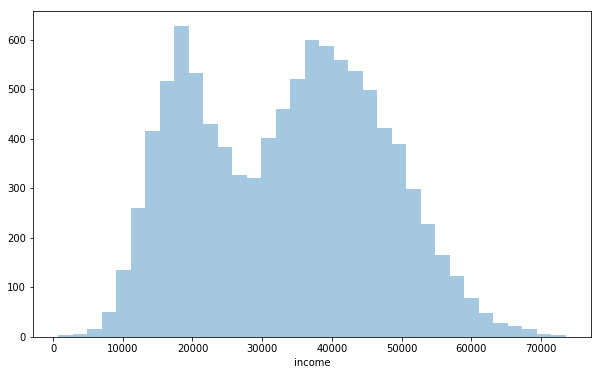

In [45]:
plt.figure(figsize=(10,6))
sns.distplot(df_new['income'],kde=False)
plt.show()

In [92]:
column_list=df_new.columns.tolist()

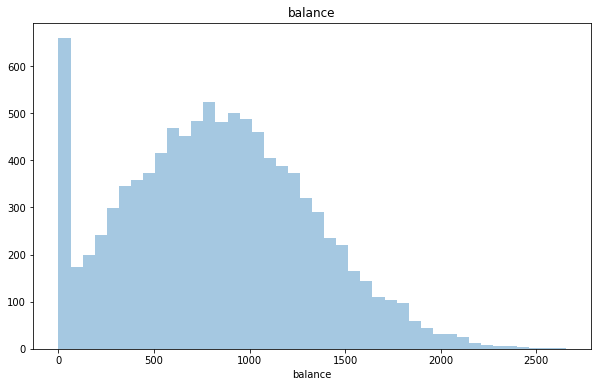

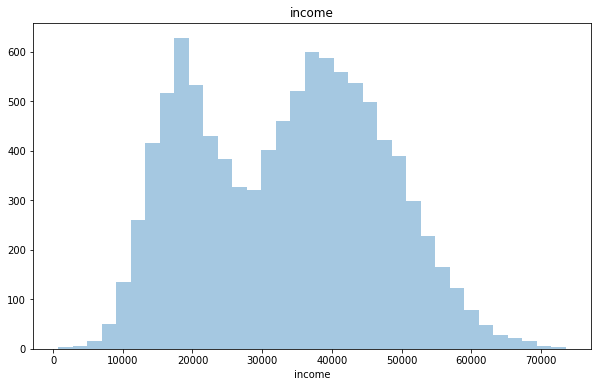

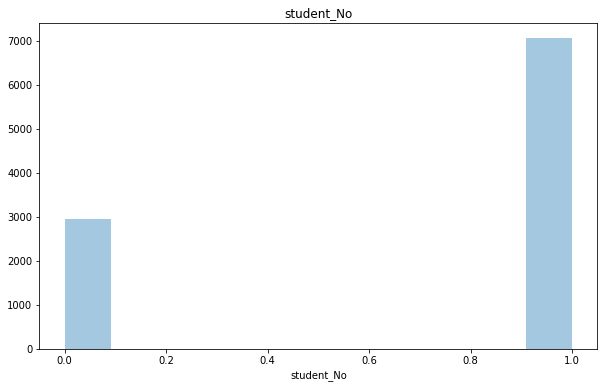

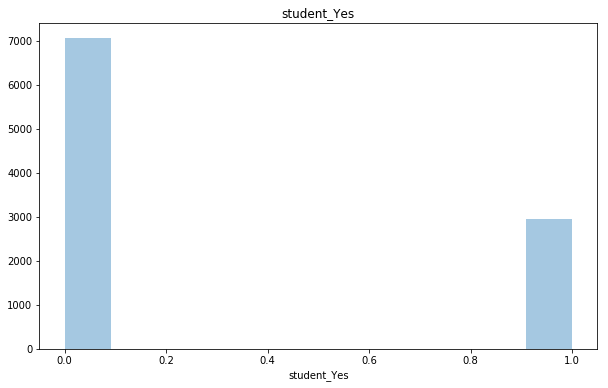

In [93]:
for column in column_list:
    plt.figure(figsize=(10,6))
    sns.distplot(df_new[column],kde=False)
    plt.title(column)
    plt.show()

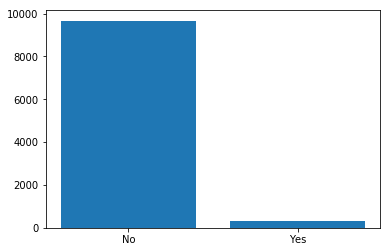

In [88]:
plt.bar([1,2],df['default'].value_counts().tolist(),tick_label=df['default'].value_counts().index)
plt.show()

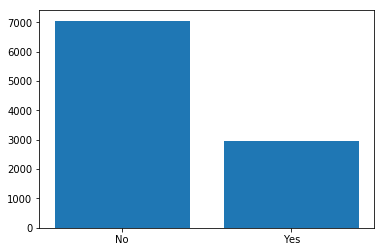

In [89]:
plt.bar([1,2],df['student'].value_counts().tolist(),tick_label=df['student'].value_counts().index)
plt.show()

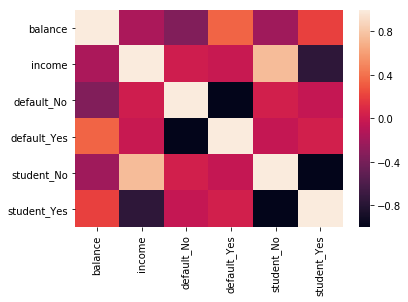

In [60]:
sns.heatmap(df_new.corr())
plt.show()

In [72]:
df_new.corr()

,balance,income,student_No,student_Yes
balance,1.000000,-0.152243,-0.203578,0.203578
income,-0.152243,1.000000,0.753985,-0.753985
student_No,-0.203578,0.753985,1.000000,-1.000000
student_Yes,0.203578,-0.753985,-1.000000,1.000000


In [65]:
df_new.head()

,balance,income,default_No,default_Yes,student_No,student_Yes
1,729.526495,44361.625074,1,0,1,0
2,817.180407,12106.134700,1,0,0,1
3,1073.549164,31767.138947,1,0,1,0
4,529.250605,35704.493935,1,0,1,0
5,785.655883,38463.495879,1,0,1,0


In [66]:
terget=df['default']

In [67]:
del df_new['default_No']
del df_new['default_Yes']

In [68]:
df_new.head()

,balance,income,student_No,student_Yes
1,729.526495,44361.625074,1,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,1,0
4,529.250605,35704.493935,1,0
5,785.655883,38463.495879,1,0


In [71]:
x_train,x_test,y_train,y_test = train_test_split(df_new,terget,test_size = 0.3)

AttributeError: 'list' object has no attribute 'shape'

In [73]:
cls=LogisticRegression()

In [74]:
cls.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
cls.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [78]:
cls.score(x_test,y_test)

0.96533333333333338

In [136]:
israel=[]
yes_count=0
no_count=0
s=terget.values.tolist()
for i in s:
    if i=="No":
        israel.append(0)
        no_count+=1
    else:
        israel.append(1)
        yes_count+=1
        

In [137]:
yes_count

333

In [138]:
no_count

9667

In [142]:
x_train,x_test,y_train,y_test = train_test_split(df_new,israel,test_size = 0.3)
cls=LogisticRegression()
cls.fit(x_train,y_train)
cls.score(x_test,y_test)

0.96899999999999997

In [150]:
y_pred=cls.predict(x_test)

In [147]:
cls.predict_proba(x_test)

array([[ 0.98619173,  0.01380827],
       [ 0.99845587,  0.00154413],
       [ 0.80523743,  0.19476257],
       ..., 
       [ 0.98694281,  0.01305719],
       [ 0.98036833,  0.01963167],
       [ 0.98754268,  0.01245732]])

# confusion matrix

In [161]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_test,y_pred)
print(confuse)

print("\nTN =",confuse[0][0])
print("FP =",confuse[0][1])
print("FN =",confuse[1][0])
print("TP =",confuse[1][1])

[[2904    4]
 [  89    3]]

TN = 2904
FP = 4
FN = 89
TP = 3


In [157]:
#overall accuracy
accuracy = (confuse[0][0] + confuse[1][1])/ len(y_test)
print("accuracy of classifier is:",accuracy)
#precision is a measure of positive predictions negative or ratio of tp/overal p
precision =  confuse[1][1]/(confuse[1][1]+confuse[0][1])
print("precision:",precision)
#recall is proportion all true positive samples.
recall = confuse[1][1]/(confuse[1][1]+confuse[1][0])
print("recall:",recall)

accuracy of classifier is: 0.969
precision: 0.428571428571
recall: 0.0326086956522


In [160]:
x_test

,balance,income,student_No,student_Yes
7865,1025.327348,44194.513713,1,0
2892,504.723353,54297.113656,1,0
4229,1589.649633,15262.421619,0,1
2528,437.035236,16261.207573,0,1
5396,1082.674545,22417.556148,0,1
3403,1127.822686,43344.894288,1,0
8185,1190.159831,30746.376971,1,0
7373,814.693522,39020.897688,1,0
8935,769.666702,39401.475060,1,0
7725,402.129015,42978.393606,1,0
